In [1]:
# setup
import planet4 as p4
import pandas as pd
from pathlib import Path
datapath = Path(p4.__path__[0]) / 'data'

from planet4 import clustering, markings, io
data = {'x':[210,211,212], 'y':[100,102, 104], 'image_x':[10010,10011,10012], 
        'image_y':[20000,20002,20004],
        'angle':[34, 37,48], 'radius_1':[20,21,19], 'radius_2':[50,51,52]}
three_blotches_data = pd.DataFrame(data)
blotch = markings.Blotch(three_blotches_data.iloc[0])

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
# test_calc_fnotch
actual = clustering.calc_fnotch(4, 4)
assert actual == 0.5
actual = clustering.calc_fnotch(4, 0)
assert actual == 1
actual = clustering.calc_fnotch(0, 4)
assert actual == 0

In [3]:
# test_dbscan_xy

# using only x and y (or image_x,image_y)
coords = ['image_x','image_y']
X = three_blotches_data[coords].values
dbscanner = clustering.DBScanner(X, min_samples=2)

assert dbscanner.reduced_data == [[0, 1, 2]]
assert dbscanner.n_rejected == 0

In [4]:
coords = ['image_x','image_y', 'angle']
X = three_blotches_data[coords].values
dbscanner = clustering.DBScanner(X, min_samples=2)

assert dbscanner.reduced_data == [[0, 1]]
assert dbscanner.n_rejected == 1

# test_simple_blotch_clustering
dbscanner = clustering.DBScanner(three_blotches_data)
cdata = dbscanner.reduced_data[0].data
assert cdata.x == 10001
assert cdata.y == 20001
assert cdata.angle == 37
assert cdata.radius_1 == 20
assert cdata.radius_2 == 51

In [5]:
dbscanner.reduced_data

[[0, 1]]

In [6]:
p4id = markings.example_p4id()

In [7]:
for eps in range(10,16):
    cm = clustering.ClusteringManager(scope='planet4', eps=eps)
    cm.cluster_image_id(p4id.imgid)
    print(cm.confusion_data)

   image_name    kind  n_markings  n_cluster_members  n_rejected
0  APF00002rq     fan           4                  0           4
1  APF00002rq  blotch          45                  1          42
   image_name    kind  n_markings  n_cluster_members  n_rejected
0  APF00002rq     fan           4                  0           4
1  APF00002rq  blotch          45                  1          42
   image_name    kind  n_markings  n_cluster_members  n_rejected
0  APF00002rq     fan           4                  0           4
1  APF00002rq  blotch          45                  1          42
   image_name    kind  n_markings  n_cluster_members  n_rejected
0  APF00002rq     fan           4                  0           4
1  APF00002rq  blotch          45                  2          39
   image_name    kind  n_markings  n_cluster_members  n_rejected
0  APF00002rq     fan           4                  0           4
1  APF00002rq  blotch          45                  2          39
   image_name    kind  n_

# Testing test database

In [10]:
data = pd.read_csv(datapath / 'test_db.csv')

In [11]:
data.image_id.value_counts()

APF000012w    408
APF000012q    133
Name: image_id, dtype: int64

In [12]:
imid1 = 'APF000012w'
imid2 = 'APF000012q'
imid1data = data[data.image_id==imid1]
imid2data = data[data.image_id==imid2]

In [13]:
outputdir = Path('/Users/klay6683/Dropbox/data/planet4/test_clustering')
cm = clustering.ClusteringManager(fnotched_dir=outputdir)

In [14]:
cm.cluster_image_id(imid1, data=imid1data)

In [15]:
imgid = markings.ImageID(imid1, data=imid1data)

In [16]:
%matplotlib nbagg

In [17]:
fans = markings.FanContainer.from_fname(str(cm.finalfanfname))

<IPython.core.display.Javascript object>


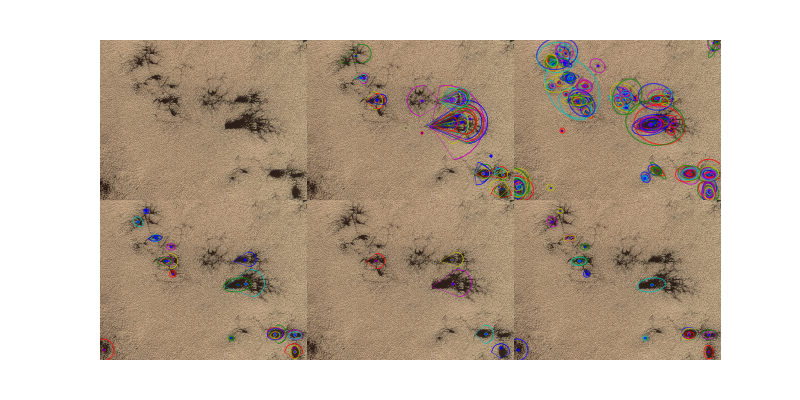

In [18]:
imgid = markings.ImageID(imid1, data=imid1data)
just_clustered_fans = cm.output_dir_clustered / cm.pm.fanfile.name
just_clustered_blotches = cm.output_dir_clustered / cm.pm.blotchfile.name

fans = markings.FanContainer.from_fname(just_clustered_fans)
blotches = markings.BlotchContainer.from_fname(just_clustered_blotches)

finalfans = markings.FanContainer.from_fname(cm.finalfanfname)
finalblotches = markings.BlotchContainer.from_fname(cm.finalblotchfname)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
axes = axes.ravel()
for ax in axes:
    imgid.show_subframe(ax=ax)
imgid.plot_fans(ax=axes[1])
imgid.plot_blotches(ax=axes[2])
imgid.plot_fans(ax=axes[4], fans=fans.content)
imgid.plot_blotches(ax=axes[5], blotches=blotches.content)
imgid.plot_fans(ax=axes[3], fans=finalfans.content)
imgid.plot_blotches(ax=axes[3], blotches=finalblotches.content)
plt.subplots_adjust(wspace=5e-3, hspace=5e-3)
for ax in axes:
    ax.set_axis_off()


In [ ]:
s23db = '/Volumes/USB128GB/planet4/2015-11-22_planet_four_classifications_queryable_cleaned_seasons2and3.h5'
cm = clustering.ClusteringManager(dbname=s23db, fnotched_dir='/Volumes/USB128GB/planet4/s23_inca')

In [ ]:
db = io.DBManager(s23db)

In [ ]:
from planet4.region_data import Inca

In [ ]:
img_names = Inca.season2 + Inca.season3

In [ ]:
img_names.index('ESP_022699_0985')

In [ ]:
for img_name in img_names[15:]:
    print(img_name)
    cm.cluster_image_name(img_name)